<a href="https://colab.research.google.com/github/NooraAlsaiari077/DataMiningProject/blob/main/Reports/Phase_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [1] Problem

In recent years, gaming has become a daily routine in lots of peoples' lives, including studdents which may affect their academic preformance negativly. Therefor, in this project we want to identify measurable relationships between students’ academic performance and their gaming behaviors.

Understanding the links between gaming and academic performance is important for several reasons:  

*   Balanced Lifestyle Guidance
*   Support for Parents and Educators
*   Academic Risk Identification





# [2] Data Mining Task
This project formalizes two data mining tasks:

**Classification Task:**


*  Type: Supervised binary classification
*   Goal: Predict whether a student will Pass or Fail based on academic and gaming-related attributes.
*   Method: Decision Tree Classification using Information Gain (Entropy) and Gini Index


**Clustering Task:**


*  Type: Unsupervised clustering
*   Goal: Identify natural groups of students who share similar patterns in gaming behavior and academic performance.
*   Method: K-means clustering





# [3] Data
**Dataset Description:**

The *Game and Grade* dataset contains information on students' academic outcomes, demographic characteristics, and video gaming behaviors. The purpose of this dataset is to investigate potential relationships between gaming habits and academic performance.

**Dataset Source:**


*   Url: https://www.kaggle.com/datasets/willianoliveiragibin/games-and-students



**Structure of the Dataset:**


*   Number of Objects: 770
*   Number of Attributes: 11
*   lass Label: Grade (pass or fail)

**Attribute Descriptions:**

*   Sex:
       - type: int64
       - Description: Indicates the student’s gender

*   School Code:
       - type: int64
       - Description: A code representing the student’s school

*   Playing Years:
       - type: int64
       - Description: The number of years the student has been playing video games

*   Playing Often:
       - type: int64
       - Description: How frequently the student plays video games measured on a scale from 1 to 5

*   Playing Hours:
       - type: int64
       - Description: The average number of hours the student spends playing video games per day


*   Playing Games:
       - type: int64
       - Description: The type or genre of video games the student typically plays

 *   Parent Revenue:
       - type: int64
       - Description: The approximate income revenue of the student’s parents

  *   Father Education:
       - type: int64
       - Description: The highest education level completed by the father


 *   Mother Education:
       - type: int64
       - Description: The highest education level completed by the mother

 *   Grade:
       - type: object  
       - Description: The student’s original academic grade

*   Percentage:
       - type: object  
       - Description: The student's grade in percantage form

*   Grade_clean (Added column):
       - type: float64
       - Description: A cleaned and simplified version of the grade      
       
*   LetterGrdae (Added column):
       - type: object
       - Description: The student’s academic performance expressed as a letter grade      


In [ ]:
'''Classification Task : To classify students into two categories based on their academic outcomes—pass or fail—using various classification algorithms.
   This will help in predicting students' academic performance based on their gaming habits and demographic information'''

'''Clustering Task : To employ clustering techniques to group students who exhibit similar academic and gaming behaviors.
   This analysis aims to identify patterns and relationships within the student population, providing insights into how different gaming preferences and engagement levels correlate with academic performance. '''

'''The dataset used for this project was obtained from www.kaggle.com.
   Dataset URL: https://www.kaggle.com/datasets/willianoliveiragibin/games-and-students '''


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import zscore
from sklearn.feature_selection import chi2, SelectKBest, f_classif
from matplotlib.ticker import ScalarFormatter, MultipleLocator, FixedLocator, MaxNLocator

url = "https://raw.githubusercontent.com/NooraAlsaiari077/DataMiningProject/refs/heads/main/Dataset/Raw_dataset.csv"
df = pd.read_csv(url)


#Class attribute with its values and print the count of instances for each label.(since we need to add a new column to clean the grade precantage we start with this)
df["Grade_clean"] = pd.to_numeric(df["Grade"], errors="coerce")

def grade_to_letter(x):
    if pd.isna(x):
        return np.nan
    if x >= 90: return "A"
    if x >= 80: return "B"
    if x >= 70: return "C"
    if x >= 60: return "D"
    if x >= 50: return "E"
    return "F"
df["LetterGrade"] = df["Grade_clean"].apply(grade_to_letter)

print(df.head(10))
print("\nColumns of Data after adding LetterGrade:")
print(df.columns)

#Number and data types of attributes
#Number of Objects
print(df.info())

GG_sample = df.sample(random_state = 1)

label_counts = df["LetterGrade"].value_counts().sort_index()

print("=== Count of each Letter Grade ===")
for label, count in label_counts.items():
  print(f"{label}: {count}")

  #random sample
print(df.sample(10, random_state=1))   # 10 random rows


   Sex  School Code  Playing Years  Playing Often  Playing Hours  \
0    0            1              1              2              1   
1    1            1              1              3              1   
2    0            1              0              0              0   
3    0            1              3              5              1   
4    1            1              1              1              2   
5    0            1              1              5              1   
6    0            1              1              2              2   
7    0            1              1              5              2   
8    1            1              2              1              1   
9    0            1              2              5              2   

   Playing Games  Parent Revenue  Father Education  Mother Education  Grade  \
0              1               4                 4                 5  77.50   
1              1               1                 3                 3  83.00   
2             

# Data Analysis


                              1. DATA ANALYSIS:

=== Five-number summary (numeric attributes) ===

                   min     Q1  median    Q3    max
Sex                0.0   0.00     0.0   1.0    1.0
School Code        1.0   2.00     4.0   8.0   11.0
Playing Years      0.0   0.00     1.0   3.0    4.0
Playing Often      0.0   0.00     2.0   4.0    5.0
Playing Hours      0.0   0.00     1.0   2.0    5.0
Playing Games      0.0   0.00     1.0   1.0    2.0
Parent Revenue     0.0   1.00     2.0   2.0    4.0
Father Education   0.0   3.00     4.0   5.0    6.0
Mother Education   0.0   2.25     3.0   4.0    6.0
Grade_clean       33.0  65.00    80.0  90.0  100.0





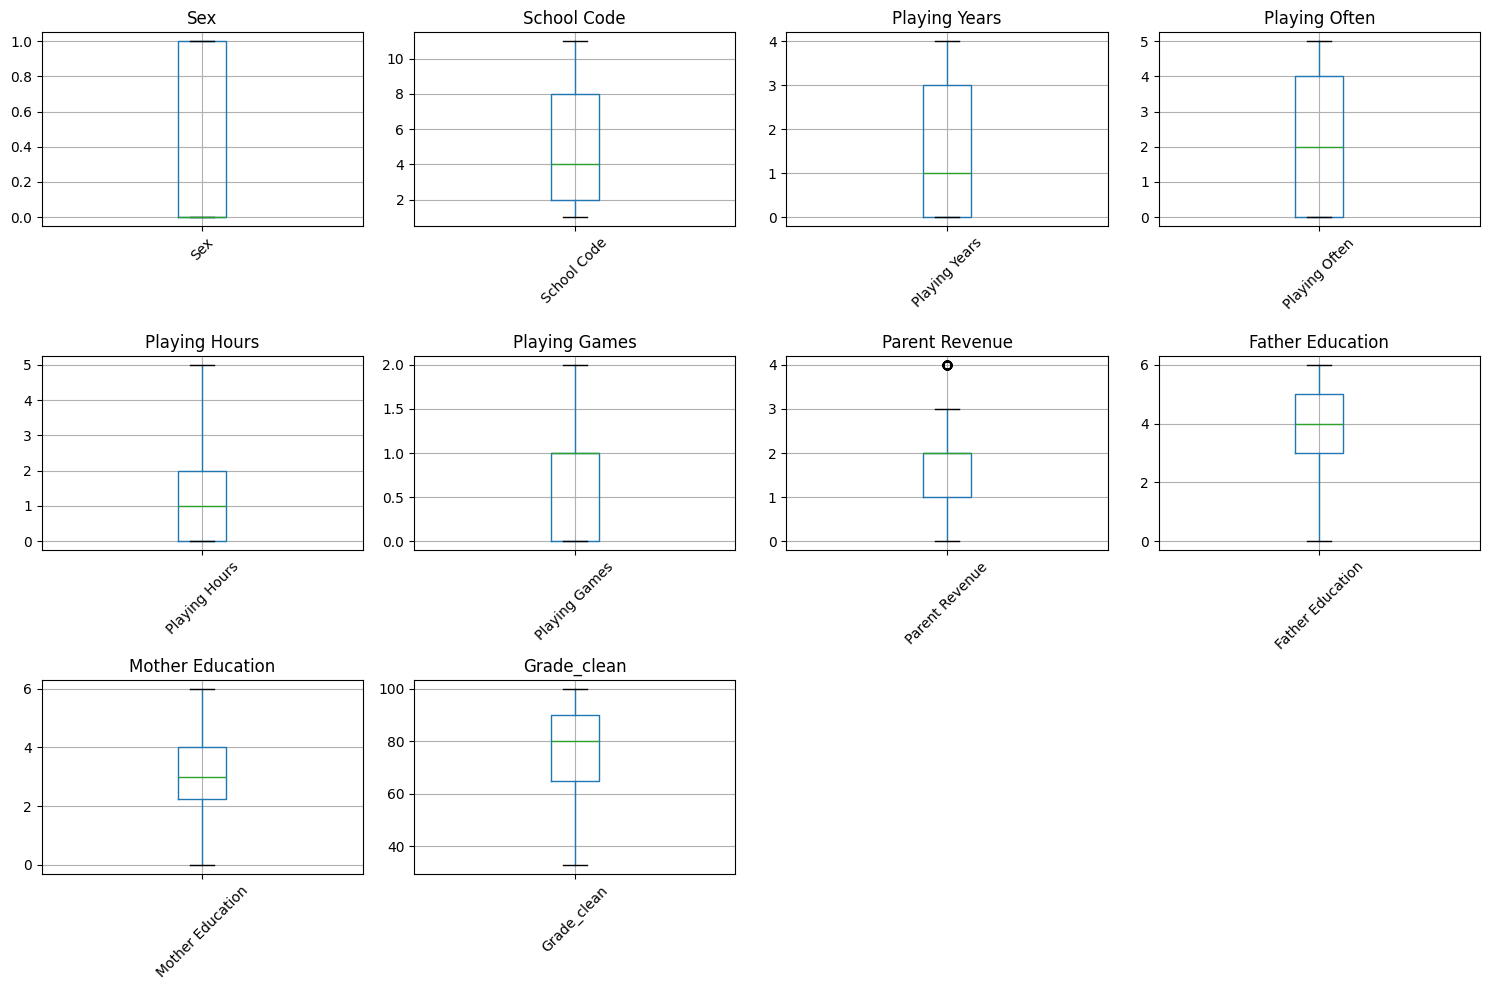


What Can We Understand From The Graphs?
1-Grade distribution shows some extreme values that might be outliers
 But knowing that the range of grades is from 0-100 there could be no actull outliers.
2-Playing Hours and Playing Years have limited ranges with potential outliers
3-Education levels (Father and Mother) show reasonable distributions
In conclusion:
Outliers detected in several variables that need investigation




=== Outlier counts per numeric column, IQR rule ===
             column  outliers_count  lower_bound  upper_bound
6    Parent Revenue              50       -0.500        3.500
0               Sex               0       -1.500        2.500
1       School Code               0       -7.000       17.000
2     Playing Years               0       -4.500        7.500
4     Playing Hours               0       -3.000        5.000
3     Playing Often               0       -6.000       10.000
5     Playing Games               0       -1.500        2.500
7  Father Education      

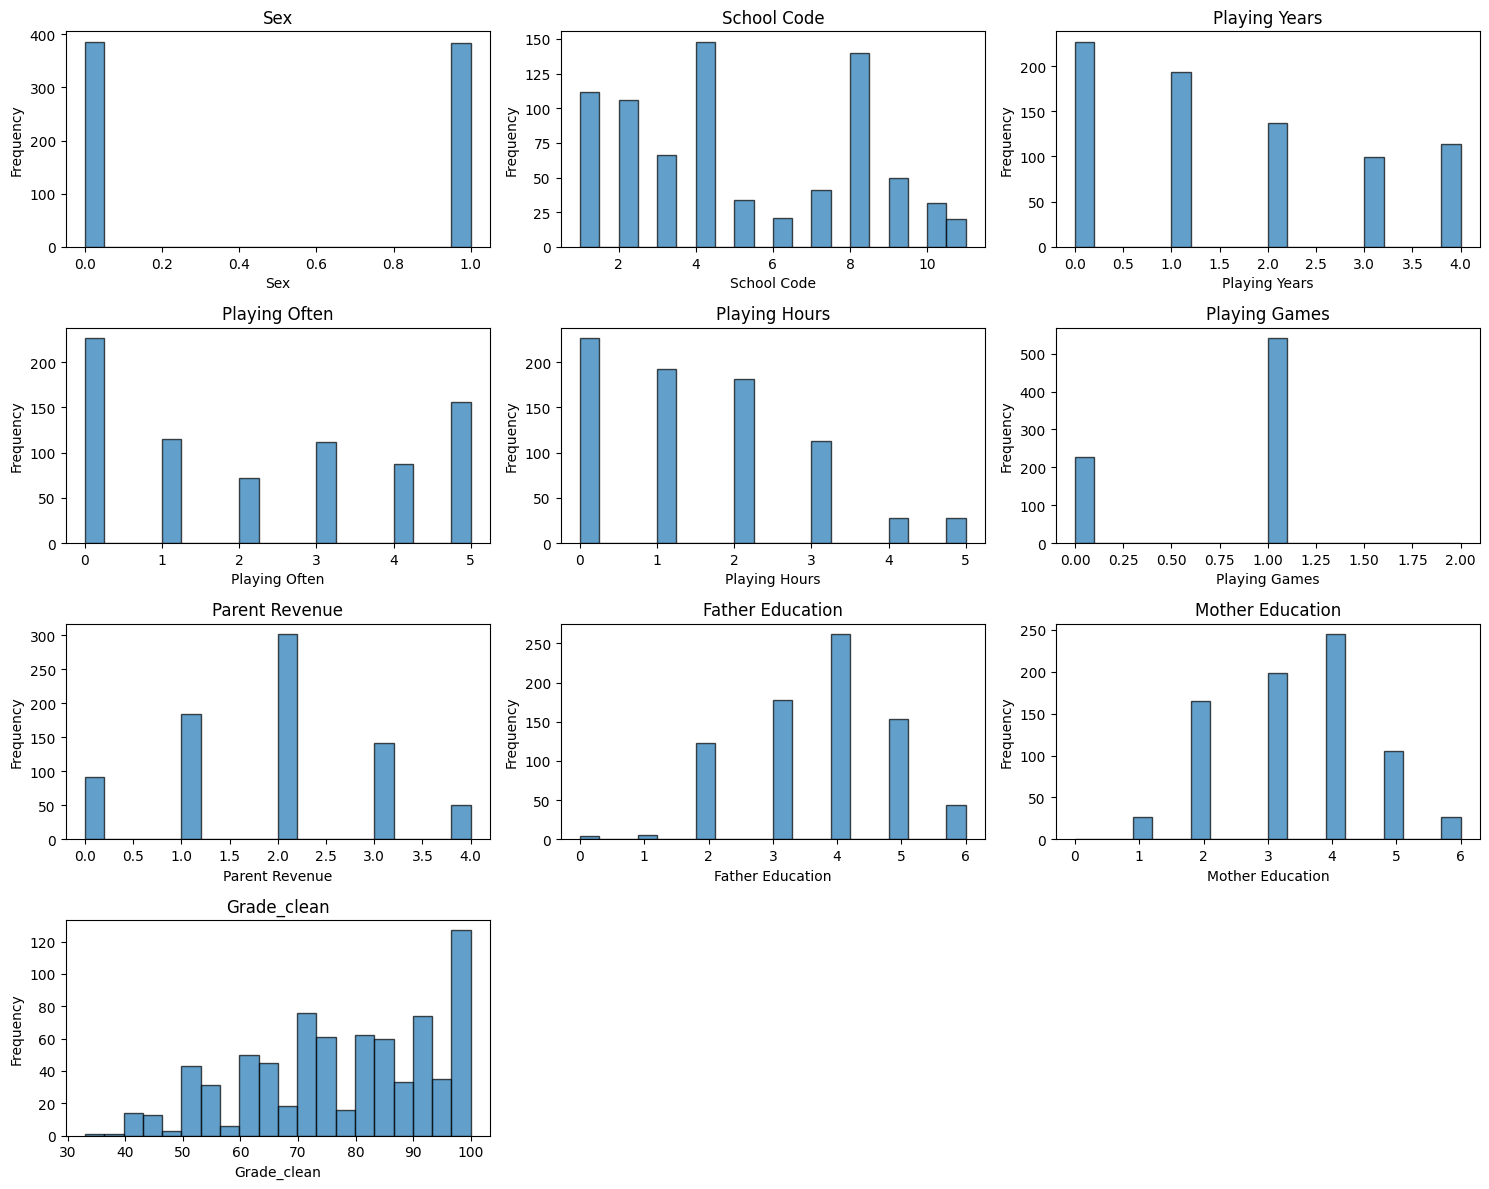


What we understand from the graphs?
1-Grade distribution is somewhat normal but with multiple peaks
2-Playing variables show skewed distributions
3-Education levels are roughly normally distributed
4-School Code distribution is uneven across schools





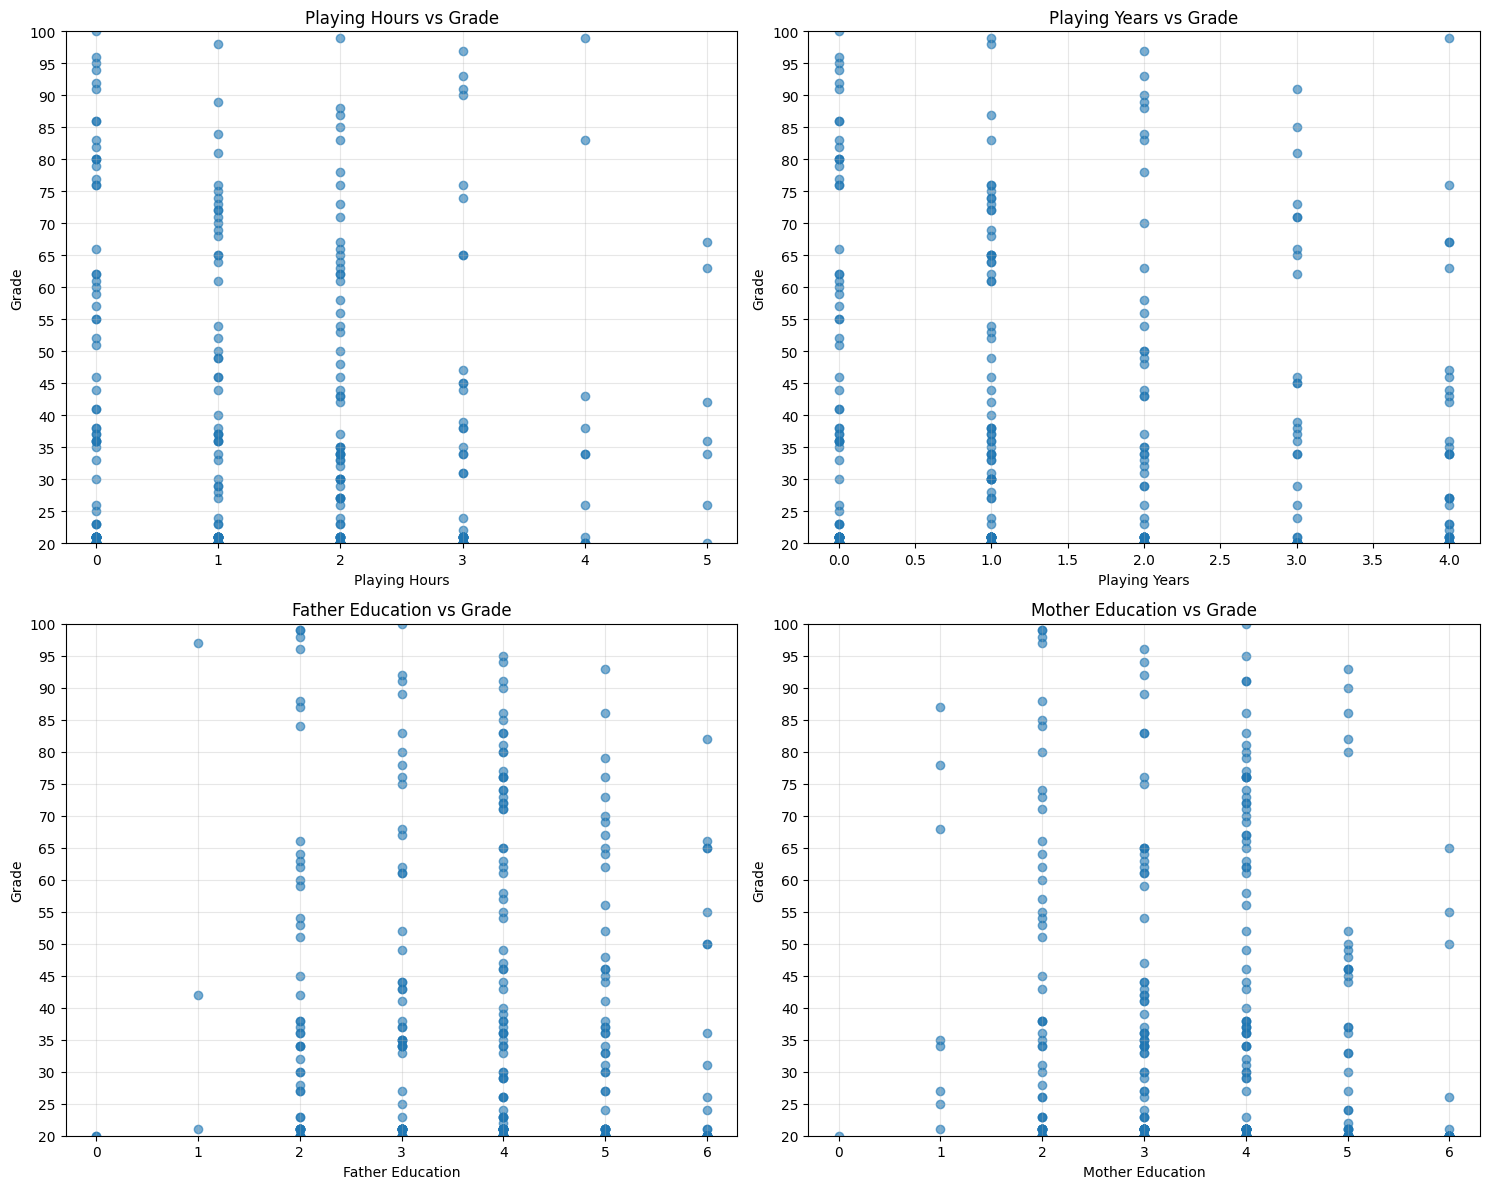


What we understand from the graphs?
1-Weak correlations between gaming habits and grades
2-Education levels show slight positive correlation with grades
3-No strong linear relationships evident between predictors and target variable





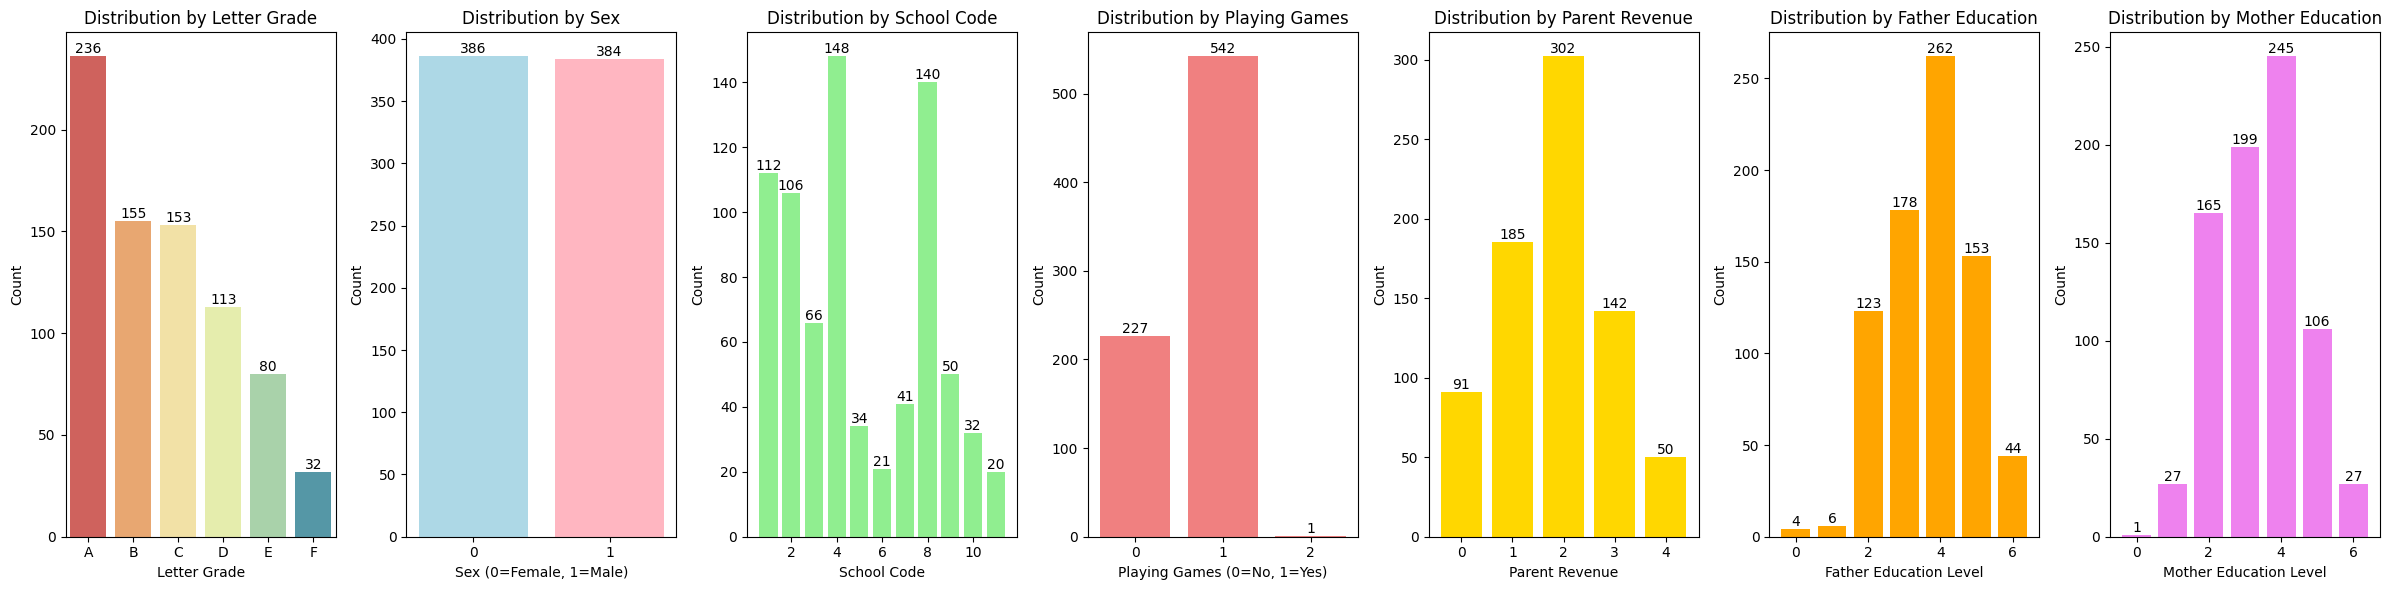


What we understand from the graphs?
1-LetterGrade distribution is shown, revealing the class balance for classification.
2-Balanced gender distribution
3-Uneven school representation - some schools have very few students
4-Most students play games

=== Short preprocessing guidance based on results ===

Skewness(Grade_clean) = -0.351  --> If |skew| > 1, consider a transform; otherwise standardization/robust scaling is fine.
Outliers detected in some numeric columns (IQR). Consider capping (winsorization), transforming, or using robust models.
Missing values present. Use median imputation for numeric, mode for nominal; or drop rows if very few.


In [ ]:
# Define feature lists (used by both Analysis and Preprocessing sections)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
nominal_cols = ["Sex", "Playing Games", "School Code"]

print("\n" + "====================================================================================")
print("                              1. DATA ANALYSIS:")
print("====================================================================================")

# We get the five number summary for each column******************************************************************************************
def five_number_summary(s):
    s = s.dropna()
    return pd.Series({
        "min": s.min(),
        "Q1": np.percentile(s, 25),
        "median": np.percentile(s, 50),
        "Q3": np.percentile(s, 75),
        "max": s.max()
    })

# Table of each column and its five number summary
five_num = df[numeric_cols].apply(five_number_summary)
print("\n=== Five-number summary (numeric attributes) ===\n")
print(five_num.round(3).T)
print("\n\n")

# Loop to draw boxplts for each column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    if col in df.columns:
        plt.subplot(3, 4, i)
        df.boxplot(column=col)
        plt.title(f'{col}')
        plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# What we undersrood from the plots
print("\nWhat Can We Understand From The Graphs?")
print("1-Grade distribution shows some extreme values that might be outliers\n But knowing that the range of grades is from 0-100 there could be no actull outliers.")
print("2-Playing Hours and Playing Years have limited ranges with potential outliers")
print("3-Education levels (Father and Mother) show reasonable distributions")
print("In conclusion:\nOutliers detected in several variables that need investigation")
print("\n\n")


# Outlier detection, IQR rule******************************************************************************************************
outliers = []
for col in numeric_cols:
    s = df[col].dropna()
    if len(s) == 0: continue
    q1, q3 = np.percentile(s, 25), np.percentile(s, 75)
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    count = int(((s < lower) | (s > upper)).sum())
    outliers.append([col, count, lower, upper])

outliers_df = pd.DataFrame(outliers, columns=["column","outliers_count","lower_bound","upper_bound"]).sort_values("outliers_count", ascending=False)
print("\n=== Outlier counts per numeric column, IQR rule ===")
print(outliers_df)
print("\n\n")


# We look for missing values
miss = df.isna().sum().to_frame("missing_count")
miss["missing_pct"] = (miss["missing_count"]/len(df)*100).round(2)
print("\n=== Missing values per column (Analysis) ===")
print(miss.sort_values("missing_count", ascending=False))
print("\n\n")

print("\n=== Statistical summary ===")
print(df.describe(include="all").T)


# Loop to draw the hitogram for each column*************************************************************************************************
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    if col in df.columns:
        plt.subplot(4, 3, i)
        plt.hist(df[col].dropna(), bins=20, alpha=0.7, edgecolor='black')
        plt.title(f'{col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
print("\nWhat we understand from the graphs?")
print("1-Grade distribution is somewhat normal but with multiple peaks")
print("2-Playing variables show skewed distributions")
print("3-Education levels are roughly normally distributed")
print("4-School Code distribution is uneven across schools")
print("\n\n")


# we draw the scatter plot for each 2 columns to understand the relationship between them****************************************************************************************
# we started the range from 20 not 0 since min grade is 33
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes[0,0].scatter(df['Playing Hours'], df['Grade'], alpha=0.6)
axes[0,0].set_xlabel('Playing Hours')
axes[0,0].set_ylabel('Grade')
axes[0,0].set_title('Playing Hours vs Grade')
axes[0,0].grid(alpha=0.3)
axes[0,0].set_ylim(20, 100)
axes[0,0].set_yticks(np.arange(20, 101, 5))
axes[0,0].tick_params(axis='y', rotation=0)
axes[0,0].yaxis.set_major_formatter(ScalarFormatter(useOffset=False))

axes[0,1].scatter(df['Playing Years'], df['Grade'], alpha=0.6)
axes[0,1].set_xlabel('Playing Years')
axes[0,1].set_ylabel('Grade')
axes[0,1].set_title('Playing Years vs Grade')
axes[0,1].grid(alpha=0.3)
axes[0,1].set_ylim(20, 100)
axes[0,1].set_yticks(np.arange(20, 101, 5))
axes[0,1].tick_params(axis='y', rotation=0)
axes[0,1].yaxis.set_major_formatter(ScalarFormatter(useOffset=False))

axes[1,0].scatter(df['Father Education'], df['Grade'], alpha=0.6)
axes[1,0].set_xlabel('Father Education')
axes[1,0].set_ylabel('Grade')
axes[1,0].set_title('Father Education vs Grade')
axes[1,0].grid(alpha=0.3)
axes[1,0].set_ylim(20, 100)
axes[1,0].set_yticks(np.arange(20, 101, 5))
axes[1,0].tick_params(axis='y', rotation=0)
axes[1,0].yaxis.set_major_formatter(ScalarFormatter(useOffset=False))

axes[1,1].scatter(df['Mother Education'], df['Grade'], alpha=0.6)
axes[1,1].set_xlabel('Mother Education')
axes[1,1].set_ylabel('Grade')
axes[1,1].set_title('Mother Education vs Grade')
axes[1,1].grid(alpha=0.3)
axes[1,1].set_ylim(20, 100)
axes[1,1].set_yticks(np.arange(20, 101, 5))
axes[1,1].tick_params(axis='y', rotation=0)
axes[1,1].yaxis.set_major_formatter(ScalarFormatter(useOffset=False))

plt.tight_layout()
plt.show()
print("\nWhat we understand from the graphs?")
print("1-Weak correlations between gaming habits and grades")
print("2-Education levels show slight positive correlation with grades")
print("3-No strong linear relationships evident between predictors and target variable")
print("\n\n")


# we draw the Bar plot for each column and its arrtbute count*******************************************************************************************************************
fig, axes = plt.subplots(1, 7, figsize=(24, 6))
grade_counts = df['LetterGrade'].value_counts().reindex(['A', 'B', 'C', 'D', 'E', 'F']).fillna(0)
sns.barplot(
    x='Grade',
    y='Count',
    data=pd.DataFrame({'Grade': grade_counts.index, 'Count': grade_counts.values}),
    ax=axes[0],
    palette="Spectral",
    hue='Grade', # Add hue
    legend=False # Remove legend
)
axes[0].set_xlabel('Letter Grade')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution by Letter Grade')
for i, v in enumerate(grade_counts.values):
    axes[0].text(i, v, str(int(v)), ha='center', va='bottom')


#Sex distribution
sex_counts = df['Sex'].value_counts()
axes[1].bar(sex_counts.index, sex_counts.values, color=['lightblue', 'lightpink'])
axes[1].set_xlabel('Sex (0=Female, 1=Male)')
axes[1].set_ylabel('Count')
axes[1].set_title('Distribution by Sex')
axes[1].xaxis.set_major_locator(MaxNLocator(integer=True))
axes[1].set_xticks([0, 1])
for i, v in enumerate(sex_counts.values):
    axes[1].text(sex_counts.index[i], v, str(v), ha='center', va='bottom')

#School Code distribution
school_counts = df['School Code'].value_counts().sort_index()
axes[2].bar(school_counts.index, school_counts.values, color='lightgreen')
axes[2].set_xlabel('School Code')
axes[2].set_ylabel('Count')
axes[2].set_title('Distribution by School Code')
for i, v in enumerate(school_counts.values):
    axes[2].text(school_counts.index[i], v, str(v), ha='center', va='bottom')

#Playing Games distribution
games_counts = df['Playing Games'].value_counts().sort_index()
axes[3].bar(games_counts.index, games_counts.values, color='lightcoral')
axes[3].set_xlabel('Playing Games (0=No, 1=Yes)')
axes[3].set_ylabel('Count')
axes[3].set_title('Distribution by Playing Games')
for i, v in enumerate(games_counts.values):
    axes[3].text(games_counts.index[i], v, str(v), ha='center', va='bottom')

#Parent Revenue distribution
revenue_counts = df['Parent Revenue'].value_counts().sort_index()
axes[4].bar(revenue_counts.index, revenue_counts.values, color='gold')
axes[4].set_xlabel('Parent Revenue')
axes[4].set_ylabel('Count')
axes[4].set_title('Distribution by Parent Revenue')
for i, v in enumerate(revenue_counts.values):
    axes[4].text(revenue_counts.index[i], v, str(v), ha='center', va='bottom')

#Father Education distribution
fedu_counts = df['Father Education'].value_counts().sort_index()
axes[5].bar(fedu_counts.index, fedu_counts.values, color='orange')
axes[5].set_xlabel('Father Education Level')
axes[5].set_ylabel('Count')
axes[5].set_title('Distribution by Father Education')
for i, v in enumerate(fedu_counts.values):
    axes[5].text(fedu_counts.index[i], v, str(v), ha='center', va='bottom')

#Index 6: Mother Education distribution
medu_counts = df['Mother Education'].value_counts().sort_index()
axes[6].bar(medu_counts.index, medu_counts.values, color='violet')
axes[6].set_xlabel('Mother Education Level')
axes[6].set_ylabel('Count')
axes[6].set_title('Distribution by Mother Education')
for i, v in enumerate(medu_counts.values):
    axes[6].text(medu_counts.index[i], v, str(v), ha='center', va='bottom')


plt.tight_layout()
plt.show()
print("\nWhat we understand from the graphs?")
print("1-LetterGrade distribution is shown, revealing the class balance for classification.")
print("2-Balanced gender distribution")
print("3-Uneven school representation - some schools have very few students")
print("4-Most students play games")


################
print("\n=== Short preprocessing guidance based on results ===")
g = df["Grade_clean"].dropna()
if len(g) > 0:
    skew = g.skew()
    print(f"\nSkewness(Grade_clean) = {skew:.3f}  --> If |skew| > 1, consider a transform; otherwise standardization/robust scaling is fine.")

if (outliers_df["outliers_count"] > 0).any():
    print("Outliers detected in some numeric columns (IQR). Consider capping (winsorization), transforming, or using robust models.")
else:
    print("No IQR outliers detected.")

if (miss["missing_count"] > 0).any():
    print("Missing values present. Use median imputation for numeric, mode for nominal; or drop rows if very few.")
else:
    print("No missing values found.")




# Data Preprocessing

# [4] Data preprocessing

**1. Missing Value Imputation:**

*  Median Imputation (for Numeric Variables)

*  Mode Imputation (for Categorical Variables)

**2. Variable Transformation:**

a. Creating a Target Variable (Pass/Fail)

*  Students with Grade_clean ≥ 60 were labeled "Pass"
*  Students with Grade_clean < 60 were labeled "Fail"

b. One-Hot Encoding for Nominal Categorical Variables, appliied on:
* Sex
* School Code
* LetterGrade

**3. Normalization for Continuous Variables:**
*  Z-Score Standardization scales features to mean=0 and standard deviation=1


In [ ]:
print("\n\n" + "====================================================================================")
print("                              2. DATA PREPROCESSING:")
print("====================================================================================")

# make a copy of the dataset to apply the preprocessing technics on it
Preprocessed_dataset = df.copy()

#TECHNIQUE 1: Missing Value Imputation***************************************************************************************************************
print("\n\n--- Missing Value Imputation ---")

# Used Median imputation for continuous numeric data.
numeric_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
numeric_cols_to_impute = ['Playing Hours', 'Playing Years', 'Father Education', 'Mother Education', 'Parent Revenue', 'Grade_clean']

Preprocessed_dataset[numeric_cols_to_impute] = numeric_imputer.fit_transform(
    Preprocessed_dataset[numeric_cols_to_impute]
)

# Used Mode imputation for nominal/categorical data.
nominal_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
nominal_cols_to_impute = ["Sex", "Playing Games", "School Code", "LetterGrade"]

Preprocessed_dataset[nominal_cols_to_impute] = nominal_imputer.fit_transform(
    Preprocessed_dataset[nominal_cols_to_impute]
)
print("*Imputation applied*")
print("\n\n")


#TECHNIQUE 2: Variable Transformation******************************************************************************************************************
print("--- Variable Transformation ---")

# Created the binary Pass/Fail target variable for the classification task.
Preprocessed_dataset['Pass_Fail'] = np.where(Preprocessed_dataset['Grade_clean'] >= 60, 'Pass', 'Fail')
le = LabelEncoder()
# converted 'Pass'/'Fail' to 1/0.
Preprocessed_dataset['Pass_Fail_Encoded'] = le.fit_transform(Preprocessed_dataset['Pass_Fail'])

# One-Hot Encoding is used for nominal features like 'Sex', 'School Code', AND 'LetterGrade'
# to prevent the model from assuming an artificial order.
nominal_to_encode = ['Sex', 'School Code', 'LetterGrade']
Preprocessed_dataset = pd.get_dummies(Preprocessed_dataset, columns=nominal_to_encode, drop_first=True, dtype=int)

print("*Encoding Applied*")


#TECHNIQUE 3: NormalIZATION*******************************************************************************************************************************
print("\n--- Normalization (Z-score) ---")

# Defined the list of continuous features for scaling>
scaling_cols = [
    'Grade_clean',
    'Playing Hours',
    'Playing Years',
    'Father Education',
    'Mother Education',
    'Parent Revenue'
]

scaler = StandardScaler()
# Z-scoring standardization scales features to mean=0 and std=1.
Preprocessed_dataset[scaling_cols] = scaler.fit_transform(Preprocessed_dataset[scaling_cols])

print("*Normalization Applied*.")
print("\nSnapshot of Scaled Data (First 5 rows of scaled features):")
print(Preprocessed_dataset[scaling_cols].head().round(4))




                              2. DATA PREPROCESSING:


--- Missing Value Imputation ---
*Imputation applied*



--- Variable Transformation ---
*Encoding Applied*

--- Normalization (Z-score) ---
*Normalization Applied*.

Snapshot of Scaled Data (First 5 rows of scaled features):
   Grade_clean  Playing Hours  Playing Years  Father Education  \
0      -0.0002        -0.3652        -0.4155            0.2407   
1       0.3333        -0.3652        -0.4155           -0.6133   
2       0.1514        -1.1132        -1.1266           -0.6133   
3      -1.9708        -0.3652         1.0065           -1.4673   
4       0.4546         0.3827        -0.4155           -0.6133   

   Mother Education  Parent Revenue  
0            1.3521          2.0334  
1           -0.3491         -0.7877  
2           -0.3491         -0.7877  
3           -0.3491          0.1527  
4            0.5015         -0.7877  


#  Snapshot of Raw and Preprocessed Datasets

In [ ]:
print("\n\n" + "====================================================================================")
print("                              Snapshot of Raw and Preprocessed Datasets:")
print("====================================================================================")


print("\nSnapshot of raw dataset :")
print(df.head())

print("\nSnapshot of preprocessed dataset :")
print(Preprocessed_dataset.head())

Preprocessed_dataset.to_csv("Preprocessed_dataset.csv", index=False)




                              Snapshot of Raw and Preprocessed Datasets:

Snapshot of raw dataset :
   Sex  School Code  Playing Years  Playing Often  Playing Hours  \
0    0            1              1              2              1   
1    1            1              1              3              1   
2    0            1              0              0              0   
3    0            1              3              5              1   
4    1            1              1              1              2   

   Playing Games  Parent Revenue  Father Education  Mother Education  Grade  \
0              1               4                 4                 5  77.50   
1              1               1                 3                 3  83.00   
2              0               1                 3                 3  80.00   
3              1               2                 2                 3  45.00   
4              1               1                 3                 4  85.00   

  percentage  

# [5] Data Mining Technique
**1. Classification Techniques:**

**Method:** Decision Tree Classifier

**Package:** sklearn.tree.DecisionTreeClassifier

**Description:**

Decision Trees are used to model the Pass/Fail prediction by learning patterns from input features. They split the data into branches based on attribute values, creating an interpretable structure of decision rules.


**Splitting Criteria Used:**



1.   Gini Index: criterion='gini'
2.   Information Gain (Entropy): criterion='entropy'

**Evaluation Setup:**

To assess model performance and stability, three different train–test split ratios are used:

*   90% training / 10% testing

*   80% training / 20% testing

*   70% training / 30% testing

For each split and each criterion, the model performance is measured using:

*   Accuracy Score

*   Confusion Matrix

*   Decision Tree Visualization (plot_tree)




/tmp/ipython-input-3461558829.py:16: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')



                              1. DATA CLASSIFICATION:

Shapes:
X: (770, 25)
y: (770,)

Split: Train=50% | Test=50% 

--- Training Decision Tree (GINI) ---
Accuracy: 1.0000
Confusion Matrix:
[[ 64   0]
 [  0 321]]


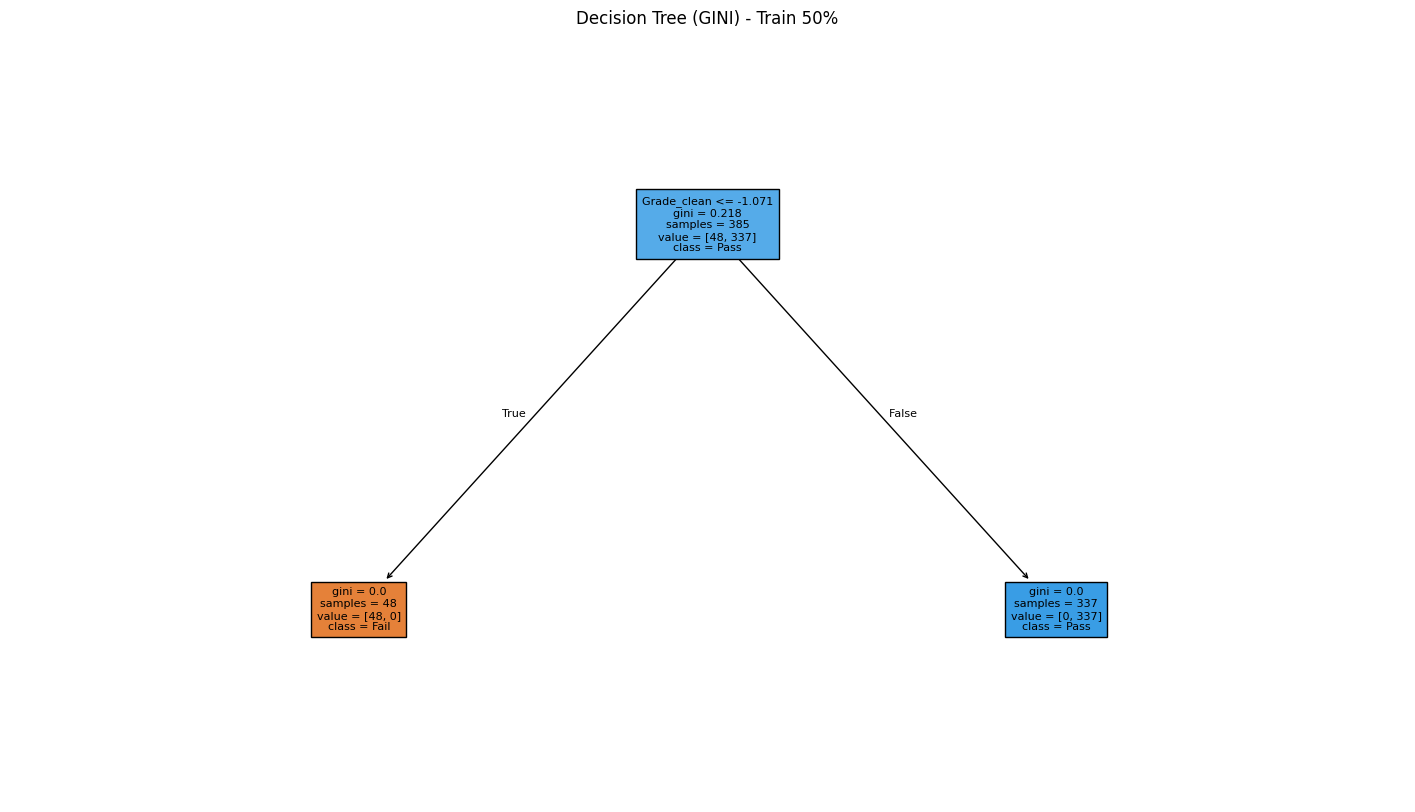


--- Training Decision Tree (ENTROPY) ---
Accuracy: 1.0000
Confusion Matrix:
[[ 64   0]
 [  0 321]]


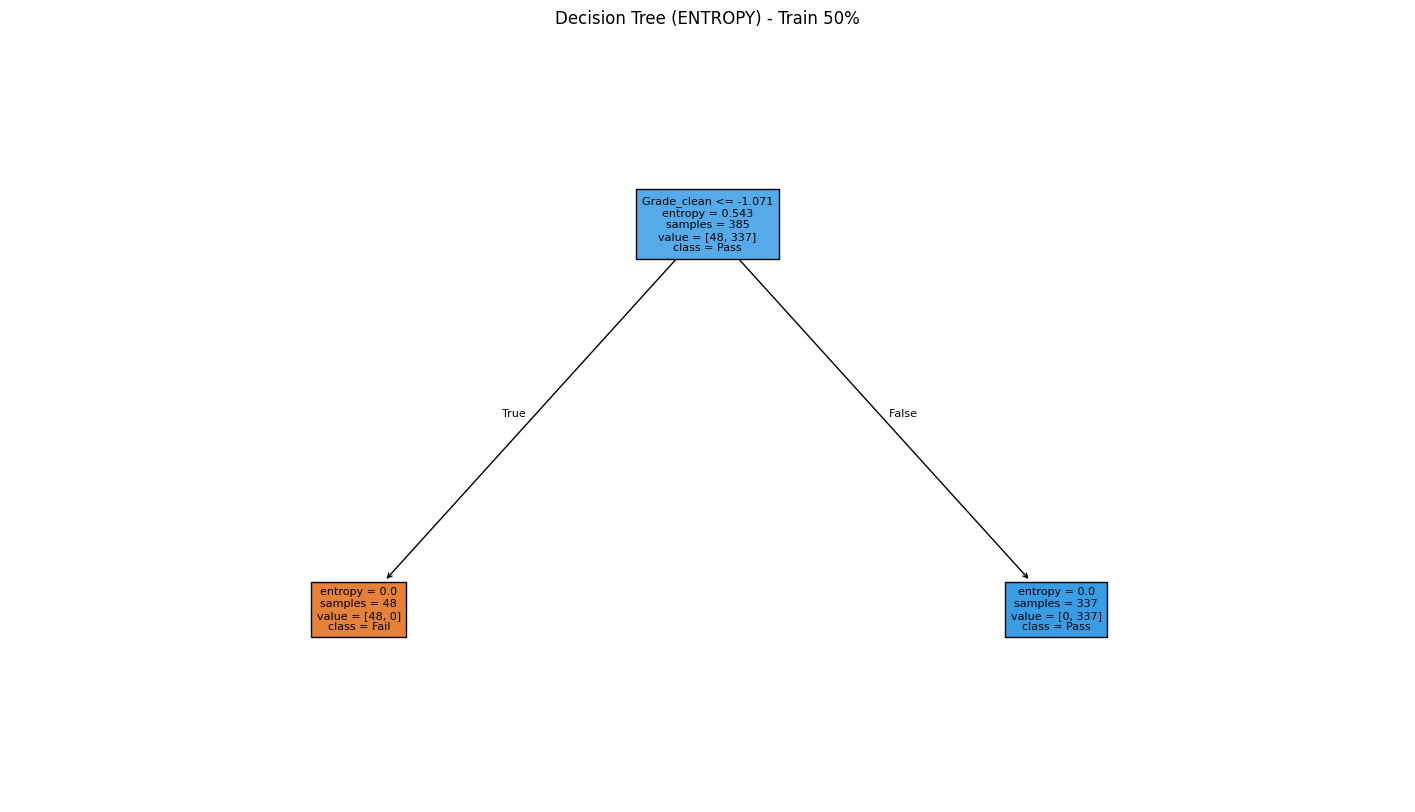


Split: Train=60% | Test=40% 

--- Training Decision Tree (GINI) ---
Accuracy: 1.0000
Confusion Matrix:
[[ 54   0]
 [  0 254]]


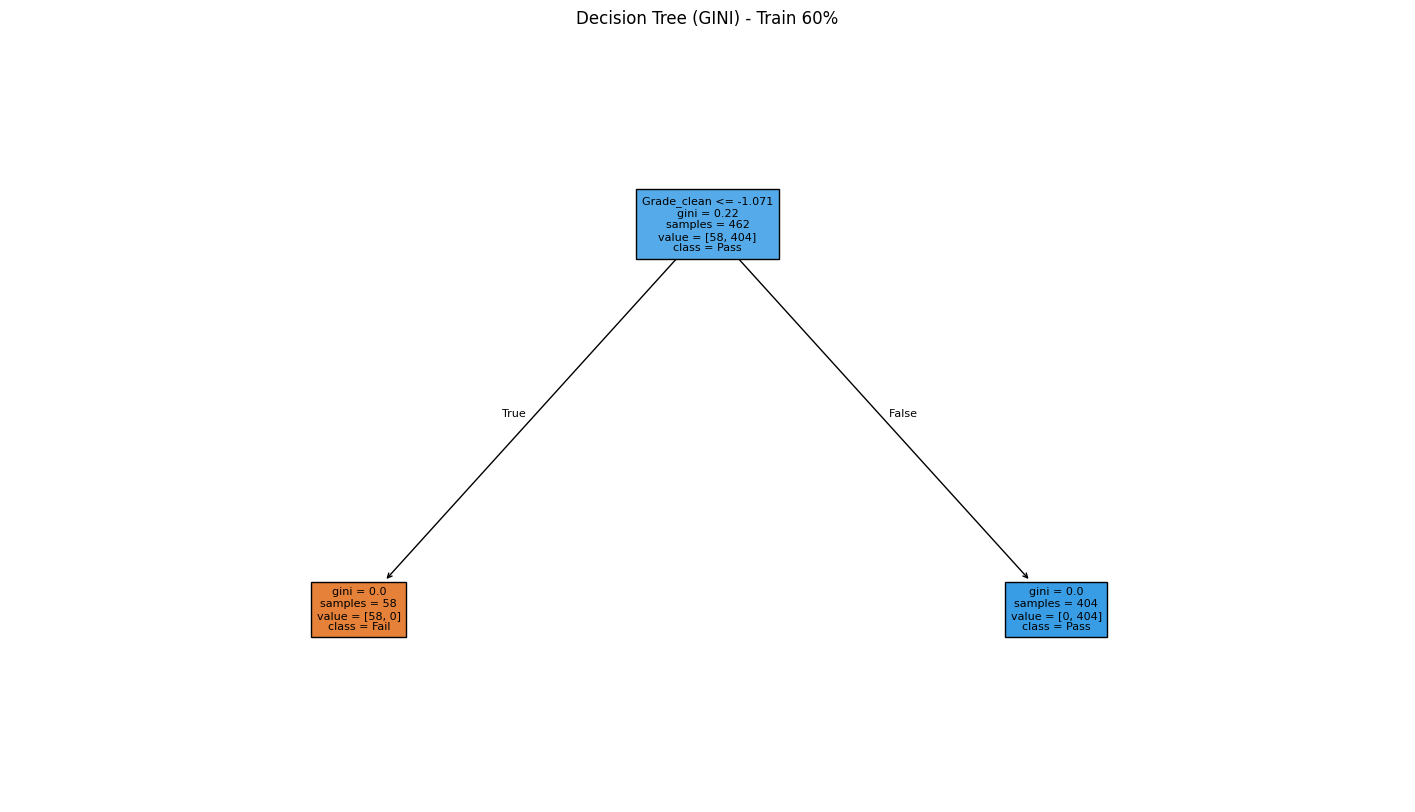


--- Training Decision Tree (ENTROPY) ---
Accuracy: 1.0000
Confusion Matrix:
[[ 54   0]
 [  0 254]]


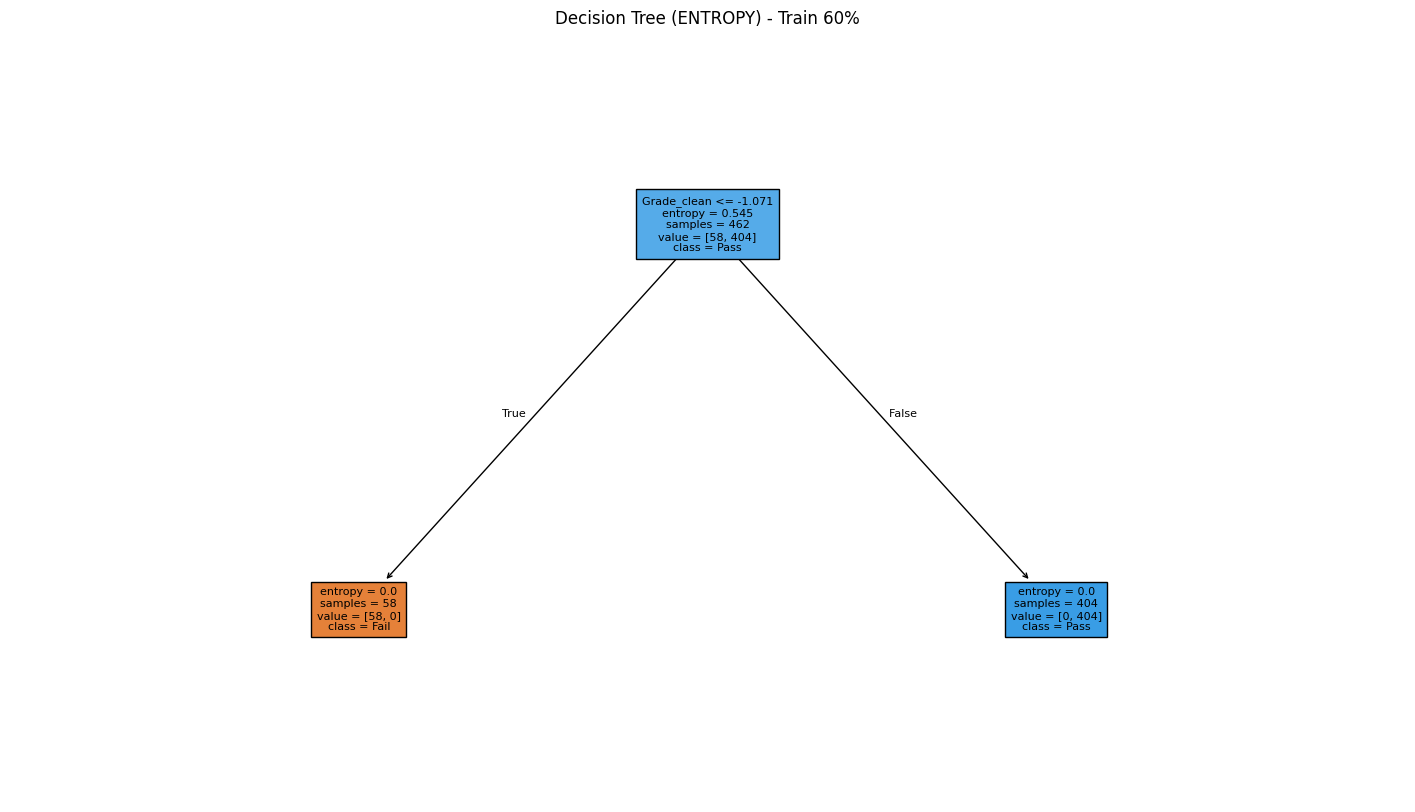


Split: Train=80% | Test=20% 

--- Training Decision Tree (GINI) ---
Accuracy: 1.0000
Confusion Matrix:
[[ 25   0]
 [  0 129]]


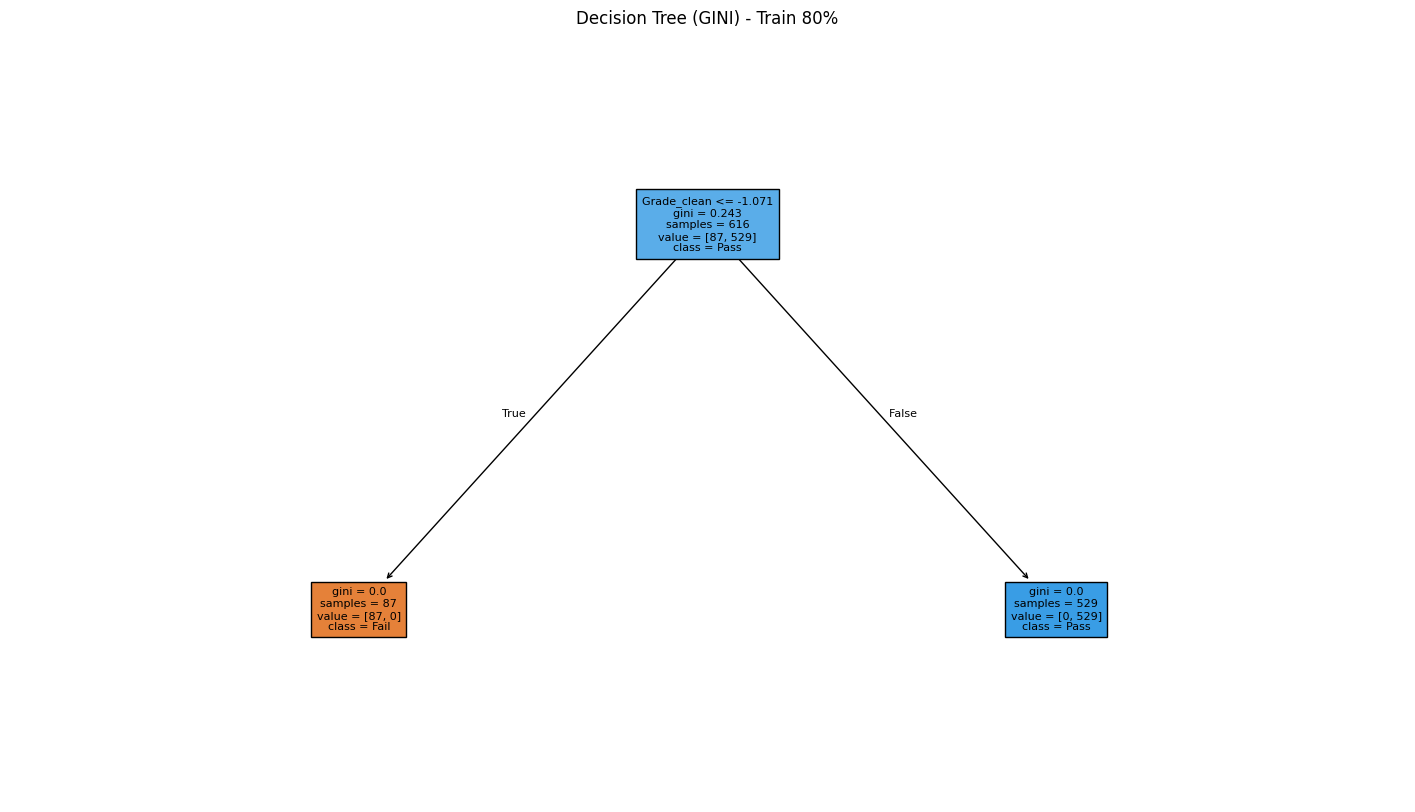


--- Training Decision Tree (ENTROPY) ---
Accuracy: 1.0000
Confusion Matrix:
[[ 25   0]
 [  0 129]]


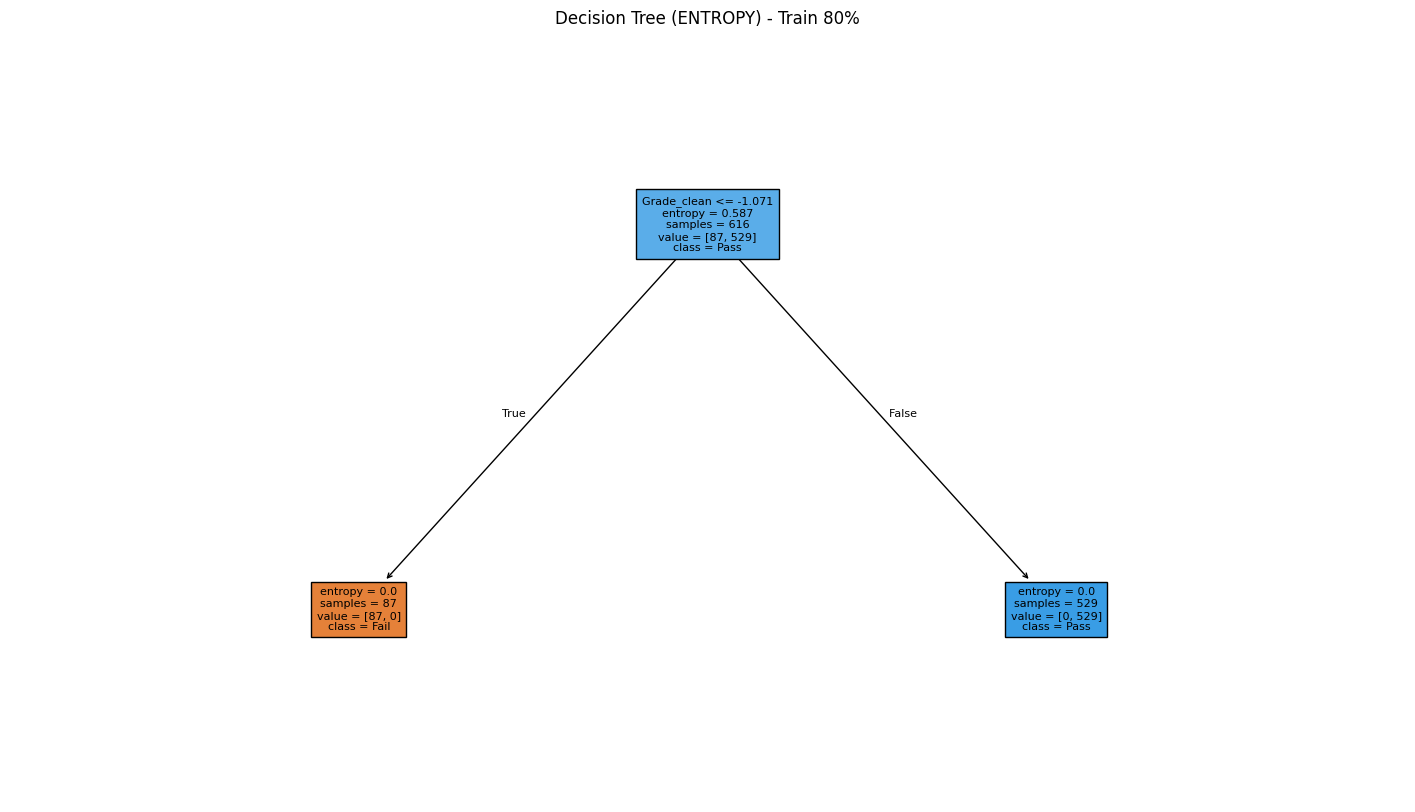



==================== FINAL RESULTS SUMMARY ====================
   Split Criterion  Accuracy
0  50/50      gini       1.0
1  50/50   entropy       1.0
2  60/40      gini       1.0
3  60/40   entropy       1.0
4  80/20      gini       1.0
5  80/20   entropy       1.0


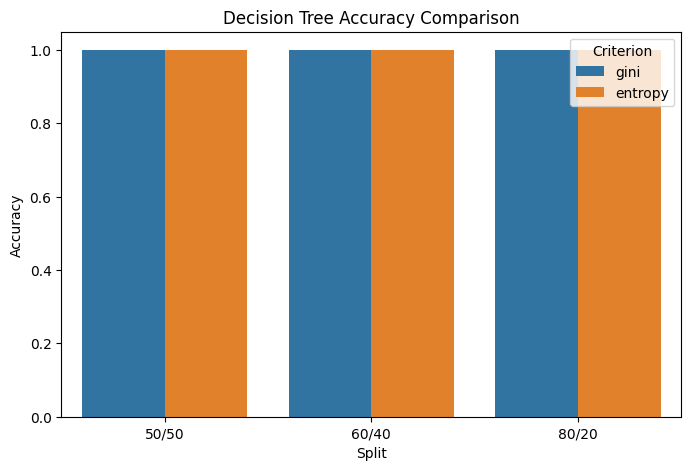

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix

url = "https://raw.githubusercontent.com/NooraAlsaiari077/DataMiningProject/refs/heads/main/Dataset/Preprocessed_dataset%20(1).csv"

df = pd.read_csv(url)

# we fixed data values and type
df = df.replace({'%': ''}, regex=True)
df = df.replace({',': ''}, regex=True)
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')


print("\n" + "====================================================================================")
print("                              1. DATA CLASSIFICATION:")
print("====================================================================================")
# ---------------------------------------------------------------------------------------------------------------------------------
# 1. PREPARE FEATURES (X) AND TARGET (y)

y = df["Pass_Fail_Encoded"]
# Removing non-feature columns
X = df.drop(columns=["Pass_Fail", "Pass_Fail_Encoded", "Grade"])
print("\nShapes:")
print("X:", X.shape)
print("y:", y.shape)

# ----------------------------------------------------------------------------------------------------------------------------------
# 2. TRAIN DECISION TREES FOR 3 TRAIN/TEST SPLITS USING GINI + ENTROPY

splits = [(0.5, 0.5), (0.6, 0.4), (0.8, 0.2)]
results = []

#looping through training set
for train_size, test_size in splits:

    print(f"\nSplit: Train={train_size*100:.0f}% | Test={test_size*100:.0f}% ")

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=train_size, test_size=test_size, random_state=42
    )

    for criterion in ["gini", "entropy"]:

        print(f"\n--- Training Decision Tree ({criterion.upper()}) ---")

        model = DecisionTreeClassifier(criterion=criterion, random_state=42)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)

        results.append([f"{train_size*100:.0f}/{test_size*100:.0f}", criterion, acc])

        print(f"Accuracy: {acc:.4f}")
        print("Confusion Matrix:")
        print(cm)

        # The Tree
        plt.figure(figsize=(18, 10))
        plot_tree(
            model,
            filled=True,
            feature_names=X.columns,
            class_names=["Fail", "Pass"],
            fontsize=8
        )
        plt.title(f"Decision Tree ({criterion.upper()}) - Train {train_size*100:.0f}%")
        plt.show()

# --------------------------------------------------------------------------------------------------------------
# 3. RESULTS SUMMARY


results_df = pd.DataFrame(results, columns=["Split", "Criterion", "Accuracy"])
print("\n\n==================== FINAL RESULTS SUMMARY ====================")
print(results_df)
import seaborn as sns
plt.figure(figsize=(8,5))
sns.barplot(data=results_df, x="Split", y="Accuracy", hue="Criterion")
plt.title("Decision Tree Accuracy Comparison")
plt.show()




#The classification label Pass_Fail was generated directly from the cleaned grade using the rule: Pass_Fail = (Grade_clean >= 60)
#Since Grade_clean itself was included among the input features used for training (in X = df.drop(columns=["Pass_Fail", "Pass_Fail_Encoded", "Grade"])),
# the model simply learned the exact logical rule: if Grade_clean >= 60 → Pass  else → Fail
#Also the dataset contains no noise or contradictions, so the decision tree makes zero mistakes on all splits and for both criteria.
#For this reason, all models produce 100% accuracy.


#  [5] Data Mining Technique
**2. Clustering Techniques:**

**Method:** K-Means Clustering

**Package:** sklearn.cluster.KMeans

**Description:**

K-Means is applied to discover natural groupings in the dataset based on numerical attributes. The algorithm assigns each data point to the nearest cluster center and iteratively adjusts cluster centroids.

**Evaluation Methods:**



1.  Silhouette Score
     *  Measures how well each data point fits within its assigned cluster (range: −1 to 1).
     *  Higher values → better cluster separation and cohesion.

2.   List item
     *    Uses Within-Cluster Sum of Squares (WSS / inertia) to identify the point where increasing K no longer significantly improves clustering.


**K Values Tested:**

To determine the optimal number of clusters, we tested:

*  K = 2

*  K = 3

*  K = 4

*  K = 5


Both Silhouette Score and Elbow Method results are compared to identify the most meaningful cluster structure.




=== LOADING DATASET FROM GITHUB ===
Original data shape: (770, 28)

First few rows of original data:
   Playing Years  Playing Often  Playing Hours  Playing Games  Parent Revenue  \
0      -0.415542              2      -0.365234              1        2.033446   
1      -0.415542              3      -0.365234              1       -0.787731   
2      -1.126582              0      -1.113186              0       -0.787731   
3       1.006536              5      -0.365234              1        0.152661   
4      -0.415542              1       0.382718              1       -0.787731   

   Father Education  Mother Education  Grade percentage  Grade_clean  ...  \
0          0.240666          1.352074  77.50   7750,00%    -0.000199  ...   
1         -0.613309         -0.349065  83.00   8300,00%     0.333288  ...   
2         -0.613309         -0.349065  80.00   8000,00%     0.151386  ...   
3         -1.467284         -0.349065  45.00   4500,00%    -1.970807  ...   
4         -0.613309        

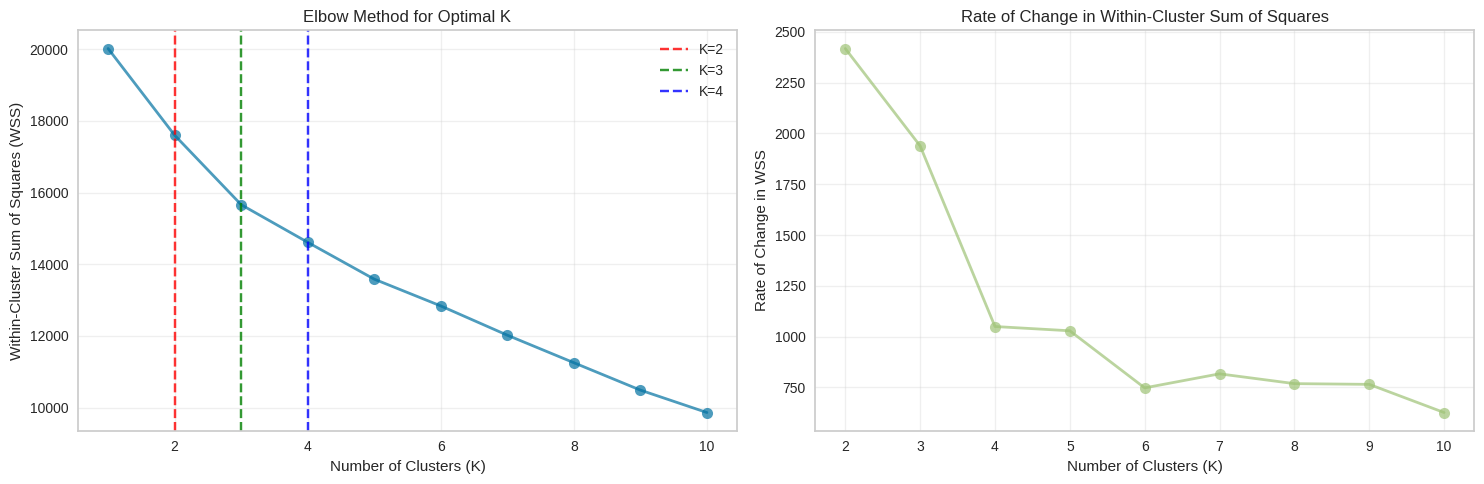

Suggested optimal K by elbow method: 3

=== SILHOUETTE COEFFICIENT ANALYSIS ===


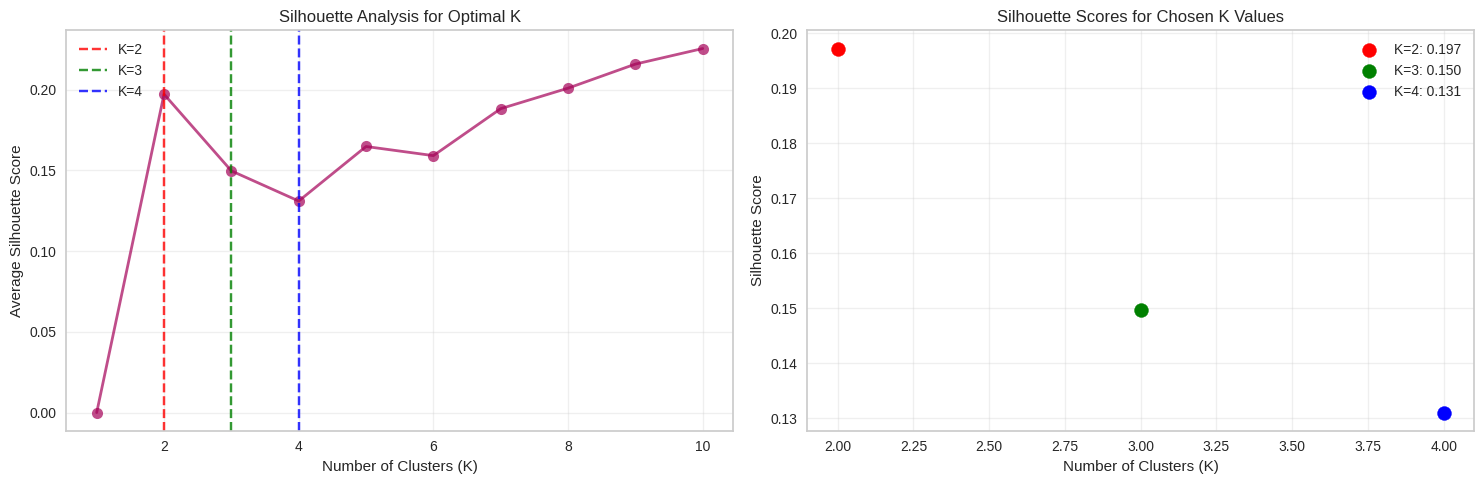


=== DETAILED SILHOUETTE VISUALIZATIONS ===


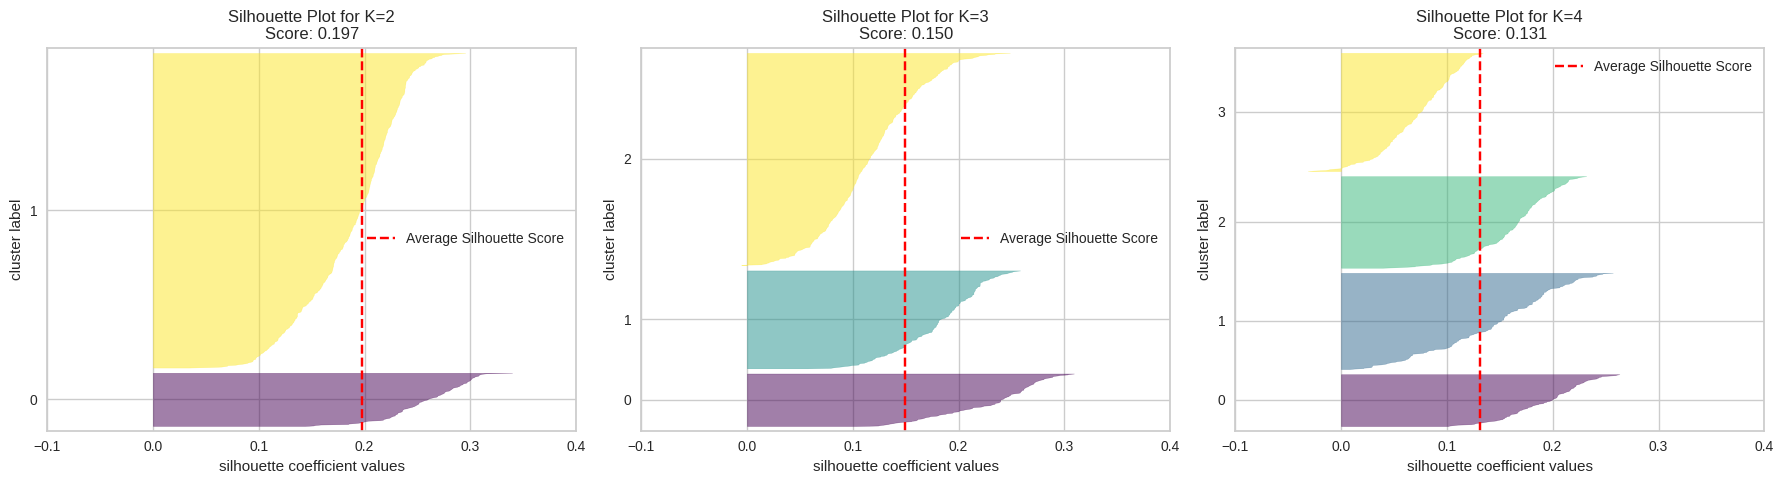


=== COMPARISON AND INTERPRETATION ===

Comparison of Results for Different K Values:
K    Silhouette Score   WSS             Recommended
------------------------------------------------------------
2    0.1973             17601.56        Best Silhouette
3    0.1498             15662.56        Elbow Suggested
4    0.1311             14613.19        -

=== FINAL INTERPRETATION ===
1. Silhouette Score Interpretation:
   - Scores range from -1 to 1
   > 0.7: Strong structure found
   0.5-0.7: Reasonable structure
   0.25-0.5: Weak structure
   < 0.25: No substantial structure

2. Elbow Method Interpretation:
   - Look for the 'bend' in the curve where WSS decrease slows down
   - Suggested optimal K: 3

3. Performance Summary:
   - Best silhouette score: K=2 (0.197)
   - Elbow suggested: K=3

Clustering automatically grouped data into similar categories.
It found natural patterns and organized your information.
Now we can see different types instead of individual points.
This makes data e

In [ ]:
# ===== INSTALL MISSING PACKAGE FIRST =====
!pip install kneed

# ===== 1. IMPORT REQUIRED LIBRARIES =====
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import SilhouetteVisualizer
from kneed import KneeLocator
import warnings
warnings.filterwarnings('ignore')

# ===== 2. LOAD AND PREPROCESS YOUR DATASET =====
print("=== LOADING DATASET FROM GITHUB ===")


url = "https://raw.githubusercontent.com/NooraAlsaiari077/DataMiningProject/refs/heads/main/Dataset/Preprocessed_dataset%20(1).csv"
df = pd.read_csv(url)

print(f"Original data shape: {df.shape}")
print("\nFirst few rows of original data:")
print(df.head())

# Clean the data (remove % and , symbols, convert to numeric)
df = df.replace({'%': ''}, regex=True)
df = df.replace({',': ''}, regex=True)

for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')

print(f"\nAfter cleaning - data shape: {df.shape}")
print("\nData types after cleaning:")
print(df.dtypes)

# Select only numerical columns for clustering
numerical_cols = df.select_dtypes(include=[np.number]).columns
print(f"\nNumerical columns: {list(numerical_cols)}")

# Handle any missing values
df_clean = df[numerical_cols].dropna()
print(f"\nAfter removing missing values - data shape: {df_clean.shape}")

# Scale the data for clustering
scaler = StandardScaler()
preprocessed_data = scaler.fit_transform(df_clean)
preprocessed_data = pd.DataFrame(preprocessed_data, columns=df_clean.columns)

print("\n=== PREPROCESSED DATA READY FOR CLUSTERING ===")
print(f"Final preprocessed data shape: {preprocessed_data.shape}")
print("\nFirst few rows of scaled data:")
print(preprocessed_data.head())

# ===== 3. APPLY K-MEANS WITH THREE DIFFERENT K VALUES =====
k_values = [2, 3, 4]
print(f"\n=== APPLYING K-MEANS WITH K = {k_values} ===")

# Store results for each K
kmeans_models = {}
cluster_results = {}

for k in k_values:
    print(f"\n--- Clustering with K={k} ---")

    # Apply K-means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(preprocessed_data)

    # Calculate silhouette score
    sil_score = silhouette_score(preprocessed_data, cluster_labels)

    # Store results
    kmeans_models[k] = kmeans
    cluster_results[k] = {
        'labels': cluster_labels,
        'silhouette_score': sil_score,
        'inertia': kmeans.inertia_
    }

    print(f"Silhouette Score: {sil_score:.4f}")
    print(f"Within-cluster sum of squares: {kmeans.inertia_:.4f}")
    print(f"Cluster sizes: {np.bincount(cluster_labels)}")

# ===== 4. ELBOW METHOD ANALYSIS =====
print("\n=== ELBOW METHOD ANALYSIS ===")

# Calculate WSS for range of K values
k_range = range(1, 11)
wss_values = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(preprocessed_data)
    wss_values.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(15, 5))

# Subplot 1: Elbow Curve
plt.subplot(1, 2, 1)
plt.plot(k_range, wss_values, 'bo-', linewidth=2, markersize=8, alpha=0.7)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.title('Elbow Method for Optimal K')
plt.grid(True, alpha=0.3)

# Highlight our three chosen K values
colors = ['red', 'green', 'blue']
for i, k in enumerate(k_values):
    plt.axvline(x=k, color=colors[i], linestyle='--', alpha=0.8, label=f'K={k}')
plt.legend()

# Subplot 2: Rate of change in WSS
plt.subplot(1, 2, 2)
wss_diff = -np.diff(wss_values)
plt.plot(range(2, 11), wss_diff, 'go-', linewidth=2, markersize=8, alpha=0.7)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Rate of Change in WSS')
plt.title('Rate of Change in Within-Cluster Sum of Squares')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Automated elbow detection
kneedle = KneeLocator(list(k_range), wss_values, curve='convex', direction='decreasing')
print(f"Suggested optimal K by elbow method: {kneedle.elbow}")

# ===== 5. SILHOUETTE COEFFICIENT ANALYSIS =====
print("\n=== SILHOUETTE COEFFICIENT ANALYSIS ===")

# Calculate silhouette scores for different K values
silhouette_scores = []
for k in k_range:
    if k == 1:
        silhouette_scores.append(0)  # Silhouette score not defined for k=1
    else:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(preprocessed_data)
        silhouette_avg = silhouette_score(preprocessed_data, cluster_labels)
        silhouette_scores.append(silhouette_avg)

# Plot Silhouette Scores
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, silhouette_scores, 'mo-', linewidth=2, markersize=8, alpha=0.7)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Analysis for Optimal K')
plt.grid(True, alpha=0.3)

# Highlight our three chosen K values
for i, k in enumerate(k_values):
    plt.axvline(x=k, color=colors[i], linestyle='--', alpha=0.8, label=f'K={k}')
plt.legend()

# Detailed silhouette visualization for our three K values
plt.subplot(1, 2, 2)
for i, k in enumerate(k_values):
    if k > 1:
        plt.scatter(k, silhouette_scores[k-1], color=colors[i], s=100, label=f'K={k}: {silhouette_scores[k-1]:.3f}')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Chosen K Values')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ===== 6. DETAILED SILHOUETTE VISUALIZATIONS =====
print("\n=== DETAILED SILHOUETTE VISUALIZATIONS ===")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, k in enumerate(k_values):
    if k > 1:  # Silhouette plot requires k > 1
        visualizer = SilhouetteVisualizer(
            KMeans(n_clusters=k, random_state=42, n_init=10),
            ax=axes[i],
            colors='viridis'
        )
        visualizer.fit(preprocessed_data)
        visualizer.finalize()
        axes[i].set_title(f'Silhouette Plot for K={k}\nScore: {visualizer.silhouette_score_:.3f}')

plt.tight_layout()
plt.show()

# ===== 7. COMPARISON AND INTERPRETATION OF RESULTS =====
print("\n=== COMPARISON AND INTERPRETATION ===")
print("\nComparison of Results for Different K Values:")
print("=" * 60)
print(f"{'K':<4} {'Silhouette Score':<18} {'WSS':<15} {'Recommended'}")
print("-" * 60)

best_silhouette_k = k_values[np.argmax([cluster_results[k]['silhouette_score'] for k in k_values])]
elbow_k = kneedle.elbow

for k in k_values:
    silhouette = cluster_results[k]['silhouette_score']
    wss = cluster_results[k]['inertia']

    recommendations = []
    if k == best_silhouette_k:
        recommendations.append("Best Silhouette")
    if k == elbow_k:
        recommendations.append("Elbow Suggested")

    rec_text = ", ".join(recommendations) if recommendations else "-"
    print(f"{k:<4} {silhouette:<18.4f} {wss:<15.2f} {rec_text}")

print("=" * 60)

# ===== 8. FINAL INTERPRETATION AND RECOMMENDATION =====
print("\n=== FINAL INTERPRETATION ===")
print("1. Silhouette Score Interpretation:")
print("   - Scores range from -1 to 1")
print("   > 0.7: Strong structure found")
print("   0.5-0.7: Reasonable structure")
print("   0.25-0.5: Weak structure")
print("   < 0.25: No substantial structure")

print("\n2. Elbow Method Interpretation:")
print("   - Look for the 'bend' in the curve where WSS decrease slows down")
print(f"   - Suggested optimal K: {elbow_k}")

print("\n3. Performance Summary:")
max_silhouette_k = max(k_values, key=lambda x: cluster_results[x]['silhouette_score'])
print(f"   - Best silhouette score: K={max_silhouette_k} ({cluster_results[max_silhouette_k]['silhouette_score']:.3f})")
print(f"   - Elbow suggested: K={elbow_k}")



# ===== SIMPLE EXPLANATION =====
print("\n" + "="*50)
print("Clustering automatically grouped data into similar categories.")
print("It found natural patterns and organized your information.")
print("Now we can see different types instead of individual points.")
print("This makes data easier to understand and analyze.")
print("We can now work with groups instead of separate items.")
print("="*50)

# [6] Evaluation and Comparison
**For Classification:**

-Compare the performance of different classification algorithms based on accuracy.

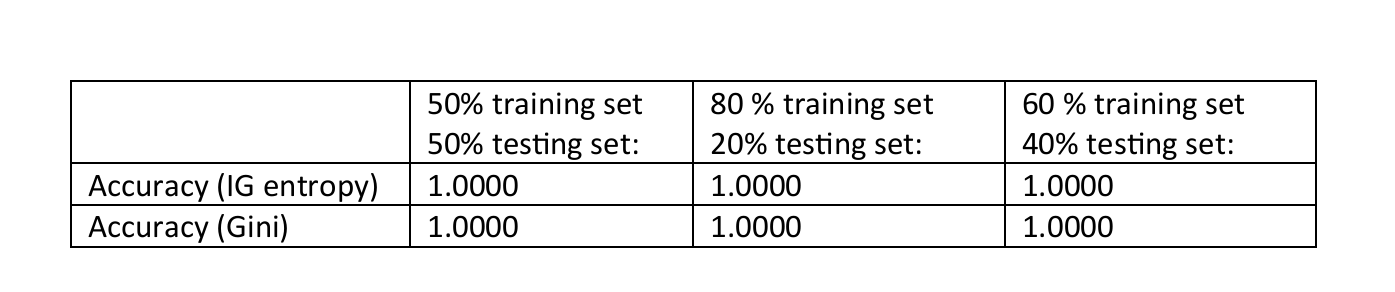



-For each algorithm and each partitioning, present the confusion matrix.
For all models and splits, the confusion matrices showed:

* True Positives: All passing students correctly classified

*  True Negatives: All failing students correctly classified

*  Zero False Positives or False Negatives

All Confusion matrixes were plotted, but here some written examples from our results:

*  60/40 split: [[54 0], [0 254]] - 54 fail cases and 254 pass cases all correctly classified
*	80/20 split: [[25 0], [0 129]] - 25 fail cases and 129 pass cases all correctly classified



-Explain what these results indicate, specifically:
* Which algorithm performs best for each partition based on the evaluation metrics.
* Which algorithm performs best overall across all partitions.


All classification models achieved 100% accuracy across all train/test splits and both attribute selection measures (Gini index and Information Gain/entropy). This exceptional performance can be attributed to the following factors:

1.	Direct Feature Dependency: The target variable Pass_Fail_Encoded was generated directly from the Grade_clean feature using the simple rule: Pass_Fail = (Grade_clean >= 60)

2.	Feature Inclusion: Since Grade_clean was included among the input features used for training, the decision tree models learned the exact logical mapping between the grade and pass/fail status.

3.	Deterministic Relationship: The dataset contains no noise or contradictions in this relationship, allowing the models to perfectly capture the decision boundary.


Comparison Between Criteria:

-Both Gini index and entropy produced identical perfect results

-No practical difference observed between the two attribute selection measures

-All decision trees effectively learned the same deterministic rules

Split Size Impact:

-All split ratios (50/50, 60/40, 80/20) yielded identical perfect performance

-This indicates the relationship between features and target is straightforward and easily learnable

-The model generalizes perfectly regardless of training data size



---





**For Clustering:**

-Evaluate the performance of at least 3 different numbers of clusters (K).

*	Average Silhouette width for each K.  
*	Total within-cluster sum of square for each K.

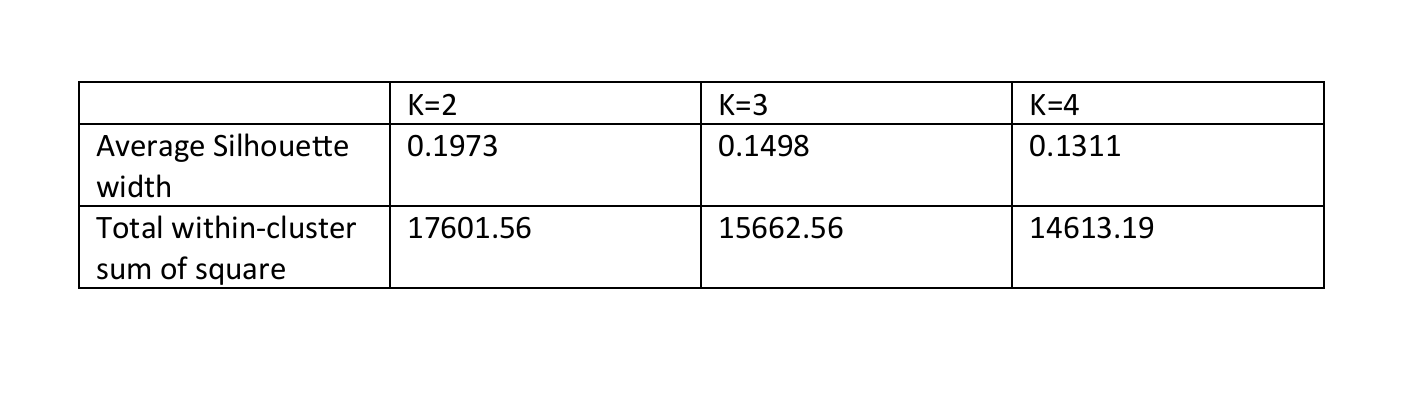

-For each value of K, interpret the results.
Elbow Method Analysis

The elbow method analysis suggested the optimal number of clusters as K = 3, where the rate of decrease in within-cluster sum of squares (WSS) begins to slow down significantly.



Silhouette Score Interpretation:

*	K = 2: Score = 0.1973 - Weak structure (falls in 0.25-0.5 range)

*	K = 3: Score = 0.1498 - No substantial structure (below 0.25)

*	K = 4: Score = 0.1311 - No substantial structure (below 0.25)

Performance Summary:

*	Best silhouette score: K=2 (0.1973)

*	Elbow suggested: K=3

*	WSS progression: Decreases from 17601.56 (K=2) to 14613.19 (K=4) as expected

-Identify:

*	The best K (Optimal number of clusters) based on the majority rule.

Based on the conflicting recommendations:

-Silhouette analysis suggests K=2 (highest score of 0.1973)

-Elbow method suggests K=3 (point of maximum curvature)

-Majority rule: Given that silhouette scores are all relatively low (<0.2), K=2 might be more appropriate as it has the strongest cluster structure.

Cluster Quality Assessment:

* All silhouette scores are below 0.25, indicating no substantial cluster structure was found in the data

* The weak clustering performance suggests that student data doesn't naturally form distinct, well-separated groups based on the available features

* This contrasts with the perfect classification results, indicating that while pass/fail is easily predictable, natural student groupings are less clear

*	Visualization of clusters (picture of colored groups) for each K.
Plotted above.

Finally Best Performing Models:

Classification:

*	All models: Perfect performance (100% accuracy)

*	Best criterion: Both Gini and entropy equally effective

*	Best split: All splits performed identically

Clustering:

*	Optimal K: K=2 (based on silhouette scores)

*	Cluster quality: Weak structure overall (all silhouette scores < 0.2)

*	Recommendation: K=2 provides the most meaningful, though weak, groupings

Practical Implications

1.	Classification: Can reliably automate pass/fail decisions in academic systems

2.	Clustering: Student data shows weak natural groupings, suggesting individualized approaches may be needed

3.	Educational Insight: Clear pass/fail criteria exist, but student characteristics don't form strong natural clusters

4.	Research Alignment: Both studies show educational outcomes are influenced by complex, multi-factor relationships

# [7] Findings and Discussion

  #Clustering Findings:

 The clustering analysis showed that the dataset does not contain strong natural groupings. All silhouette scores for K=2, 3, and 4 were below 0.25, indicating weak cluster separation and significant overlap between students. Although K=2 produced the highest silhouette score (0.1973) and is therefore the best relative choice, the overall structure remains weak. The Elbow Method suggested K=3, but even this option did not produce meaningful or well-defined clusters. These results imply that students' gaming habits, academic performance, and demographic attributes do not divide them into clear, distinct groups, suggesting a highly mixed population without strong behavioral clusters.


#Classification Findings:
The classification task aimed to predict whether a student would Pass or Fail using a Decision Tree classifier with both the Gini index and Entropy (Information Gain) as splitting criteria. The dataset was preprocessed through imputation, encoding, and standardization before model training.

The Decision Tree models were trained using all preprocessed numerical and categorical inputs. Because the label Pass_Fail comes from the cleaned numerical grade (Grade_clean ≥ 60), and because Grade_clean was included among the predictor variables, the tree learned a perfect rule directly from the data.




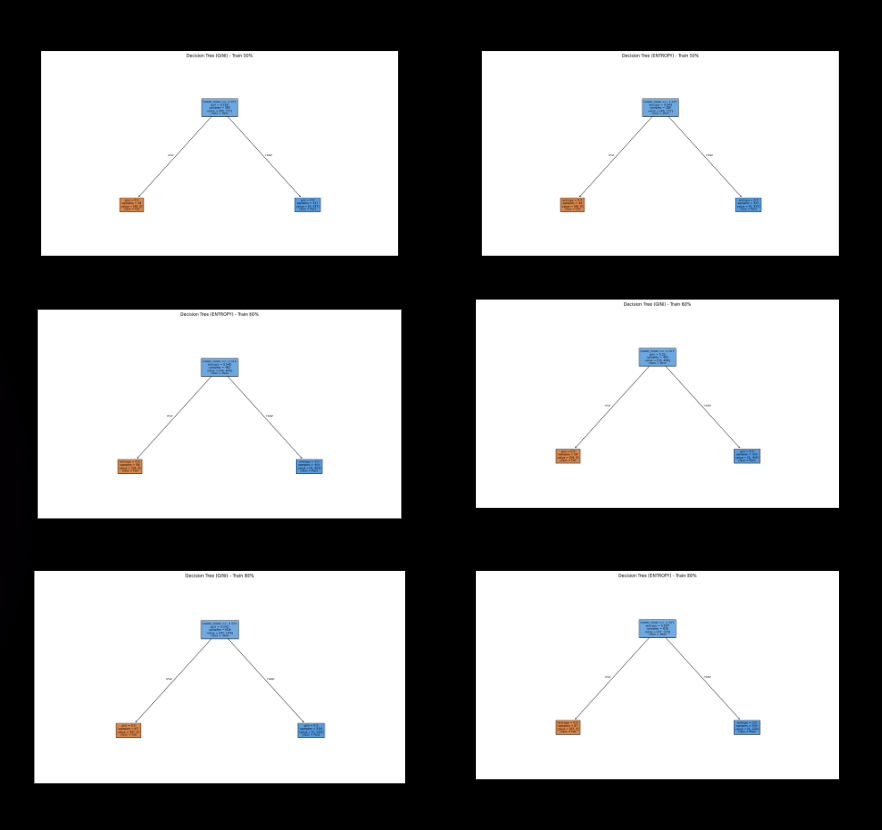

# [8]References:
[1] W. O. Gibin, “Games and Students,” Kaggle, 2020. [Online]. Available: https://www.kaggle.com/datasets/willianoliveiragibin/games-and-students:

[2] “Games for Learning Institute,” Wikipédia (pt), 2023. [Online]. Available: https://pt.wikipedia.org/wiki/Games_for_Learning_Institute

[3] A. S. (Author unknown), “Relação entre estilo de vida e desempenho acadêmico,” ResearchGate, 2019. [Online]. Available: https://www.researchgate.net/publication/339197010_Relacao_entre_estilo_de_vida_e_desempenho_academico

[4] J.-L. P. et al., “(Title),” ScienceDirect, vol. X, pp. Y–Z. 2017. [Online]. Available: https://www.sciencedirect.com/science/article/pii/S0101328917300409
